In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# インプットデータの作成
base_dir = '../0831share/interpolated_motor_data_20220630/model0/seed'
df_label = pd.read_csv('../0831share/aisin_motor_data_20220728/model0/for_label_data.csv')
for i, row in df_label.iterrows():
    seed = int(row['SEED'])
    magnet_num = int(row['DATA_No'])
    df_magnet = pd.read_csv(f'{base_dir}{seed}/{magnet_num}_magnet.csv', header=None)
    each_coords = np.hstack([df_magnet[2], df_magnet[3]])
    if not i:
        coords_array = each_coords
    else:
        coords_array = np.vstack([coords_array, each_coords])

coords_mean = coords_array.mean(axis=0)
coords_std = coords_array.std(axis=0)
coords_standardized = (coords_array - coords_mean) / coords_std
coords_mean = np.reshape(coords_mean, (1, 220))
coords_std = np.reshape(coords_std, (1, 220))

In [4]:
DATA_PATH = '../motor_dataset_20221018st'

In [5]:
torques_npz = np.load(f"{DATA_PATH}/labels.npz")
coords_npz = np.load(f"{DATA_PATH}/coords.npz")
torques = torques_npz[torques_npz.files[0]]
torque_mean = torques_npz[torques_npz.files[2]]
torque_std = torques_npz[torques_npz.files[3]]
coords = coords_npz[coords_npz.files[0]]
coord_mean = coords_npz[coords_npz.files[1]]
coord_std = coords_npz[coords_npz.files[2]]


In [14]:
c = coords * coord_std + coord_mean
t = torques + torque_std + torque_mean

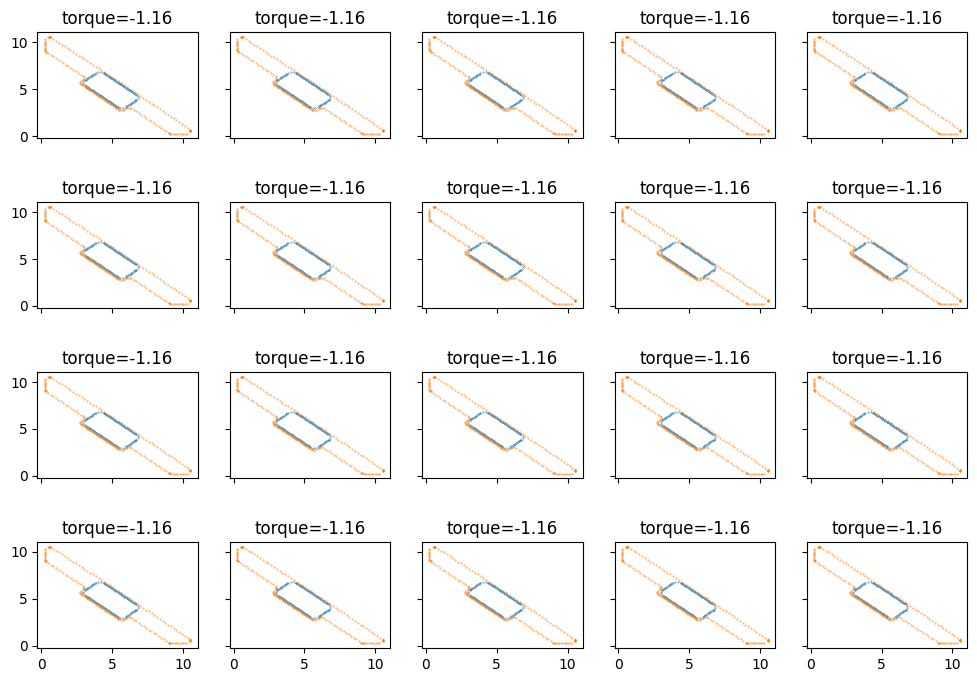

In [35]:
idx = 0
gen_coords = c[idx]
labels = t[0]

data_size = gen_coords.shape[0]

fig, ax = plt.subplots(4, min(5, data_size//4), figsize=(12, 8), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.6)
for i in range(min(20, data_size)):
    coord = gen_coords
    label = labels

    ax[i%4, i//4].scatter(coord[:136], coord[136:272], s=0.1)  # 磁石
    ax[i%4, i//4].scatter(coord[272:272+184], coord[272+184:272+368], s=0.1)  # 穴
    # ax[i%4, i//4].plot(coord[272+368:272+368+146], coord[272+368+146:])  # 外枠
    torque = round(label.item(), 3)
    title = f'torque={torque}'
    ax[i%4, i//4].set_title(title)

plt.show()
plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def save_coords_motor(gen_coords, labels, path):
    data_size = gen_coords.shape[0]
    fig, ax = plt.subplots(4,min(5, data_size//4), sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.6)
    for i in range(min(20, data_size)):
        coord = gen_coords[i][0]
        label = labels[i]
        # x = np.hstack([coord[:136], coord[272:272+184], coord[272+368:272+368+146]])
        # y = np.hstack([coord[136:272], coord[272+184:272+368], coord[272+368+146:]])
        x = np.hstack([coord[:136], coord[272:272+184]])
        y = np.hstack([coord[136:272], coord[272+184:272+368]])
        ax[i%4, i//4].plot(x,y)
        torque = round(label.item(), 3)
        title = f'torque={torque}'
        ax[i%4, i//4].set_title(title)
    
    fig.savefig(path)
    plt.close()